# Financial Analysis

Financial figures of Microsoft, Tesla and Apple for the last three fiscal years save as a CSV file (`financial_data.csv`):

## Print column names to verify

- The column name of the CSV file shold be exactly match with what you are referencing in the code.
- Use the following code to print all column names in your DataFrame:

In [3]:
import pandas as pd
df = pd.read_csv('./data/financial_data.csv')
print(df.columns)

Index(['Company', 'Year', 'Total Revenue (in millions)',
       'Net Income (in millions)', 'Total Assets (in millions)',
       'Total Liabilities (in millions)',
       'Cash Flow from Operating Activities (in millions)'],
      dtype='object')


## Calculate YoY Growth

### Convert financial figures to numeric
In the dataset, financial figures can be stored as strings (likely due to commas in the numbers). Clean the data by converting these columns into numeric format and then proceed with the analysis.

### Calculate YoY Growth
#### Sorting the Data by Company and Year

Ensures that data is ordered chronologically for each company before performing calculations.

#### Calculating YoY Percentage Change for Each Financial Metric

- **Calculates YoY revenue growth**: Computes the year-over-year revenue growth for each company.

- **Calculates YoY net income growth**: Computes the percentage change in net income from the previous year.

- **Calculates YoY assets growth**: Computes the year-over-year percentage change in total assets.

- **Calculates YoY liabilities growth**: Computes the year-over-year percentage change in total liabilities. Indicates whether a company is increasing or decreasing its debt over time.

- **Calculates YoY cash flow growth**: Computes the percentage change in cash flow from operations (CFO). CFO indicates how much cash a company generates from core business operations.

In [5]:
import pandas as pd
df = pd.read_csv('./data/financial_data.csv')

# Convert financial figures to numeric
df.replace(',', '', regex=True, inplace=True)
df.iloc[:, 2:] = df.iloc[:, 2:].astype(int)

# Calculate YoY Growth
df.sort_values(by=['Company', 'Year'], inplace=True)
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue (in millions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income (in millions)'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets (in millions)'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities (in millions)'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities (in millions)'].pct_change() * 100

print(df)

     Company  Year Total Revenue (in millions) Net Income (in millions)  \
8      Apple  2022                      394328                    99803   
7      Apple  2023                      383285                    96995   
6      Apple  2024                      391035                    93736   
2  Microsoft  2022                      198270                    72738   
1  Microsoft  2023                      211915                    72361   
0  Microsoft  2024                      245122                    88136   
5      Tesla  2022                       81462                    12587   
4      Tesla  2023                       96773                    14974   
3      Tesla  2024                       97690                     7153   

  Total Assets (in millions) Total Liabilities (in millions)  \
8                     352755                          302083   
7                     352583                          290437   
6                     364980                          308

### Key Insights from the Data:

#### 1. Apple’s Performance:
- **Revenue Trend**: A slight decline in 2023 (-2.8%), followed by a modest recovery (+2.02%) in 2024.
- **Net Income Decline**: Apple’s net income decreased consistently over the three years (-2.81% in 2023 and -3.36% in 2024), indicating a potential rise in expenses or lower profit margins.
- **Assets & Liabilities**: Apple’s total assets increased (3.51% in 2024) after a slight dip, while liabilities fluctuated. 
- **Cash Flow Concerns**: Declining cash flow in 2023 (-9.50%) but recovered slightly in 2024 (+6.97%).

#### 2. Microsoft’s Strong Growth:
- **Revenue Growth**: Microsoft’s revenue grew consistently (+6.88% in 2023, +15.67% in 2024), showing strong market performance.
- **Profit Surge in 2024**: While net income remained stable in 2023, it jumped +21.80% in 2024, suggesting better cost management or revenue streams.
- **Asset Expansion**: Microsoft’s assets grew significantly (+12.91% in 2023, +24.32% in 2024), likely due to increased investments or acquisitions.
- **Cash Flow Strength**: A huge surge (+35.35% in 2024) after a minor decline in 2023 suggests improved operational efficiency.

#### 3. Tesla’s Volatility:
- **Revenue Growth**: Tesla had the highest revenue growth** among the three companies in 2023 (+18.79%) but slowed down significantly in 2024 (+0.95%).
- **Net Income Drop**: Despite revenue growth, net income declined sharply (-52.23% in 2024), indicating rising costs or shrinking margins.
- **Rapid Expansion**: Tesla aggressively increased assets (+29.48% in 2023, +14.49% in 2024) while also taking on higher liabilities (+18.02% in 2023, +12.51% in 2024).
- **Cash Flow Fluctuations**: Declined in 2023 (-9.97%) but rebounded in 2024 (+12.57%).

#### 4. Overall Takeaways:
- Microsoft shows the strongest financial health with consistent growth, rising profitability, and strong cash flow.  
- Apple is stable but faces declining net income and cash flow issues.
- Tesla has high volatility, strong growth but profitability concerns.

## Visualizing Year-over-Year (YoY) Revenue Growth
Below visualizes the revenue growth of different companies over time using Matplotlib.

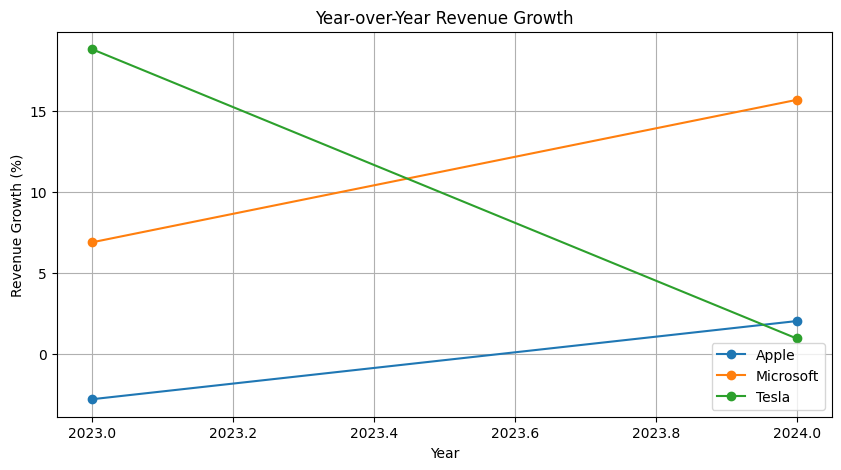

In [8]:
import matplotlib.pyplot as plt

# Visualize Revenue Growth
plt.figure(figsize=(10,5))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Revenue Growth (%)'], marker='o', label=company)
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.title('Year-over-Year Revenue Growth')
plt.legend()
plt.grid(True)
plt.show()

### Key Insights from the Plot:

The line plot visualizes the year-over-year revenue growth (%) for each company (Microsoft, Tesla, and Apple) over the last three fiscal years. The plot allows to compare the revenue growth of Microsoft, Tesla, and Apple side by side.

#### 1. Tesla:
- Tesla's revenue growth might fluctuate more due to its reliance on automotive sales and production challenges.
- From 2022 to 2023: Growth ≈18.80%
- From 2023 to 2024: Growth ≈0.95%
- Tesla's growth slows significantly in 2024, possibly due to market saturation or production constraints.
- Tesla  exhibits high volatility, with a sharp slowdown in 2024, indicating potential challenges in scaling or market demand.

#### 2. Apple:
- Apple's revenue growth may show moderate fluctuations, reflecting its maturity as a company and dependence on product cycles (e.g., iPhone releases).
- From 2022 to 2023: Growth ≈−2.80%
- From 2023 to 2024: Growth ≈2.02%
- Apple  demonstrates slower growth, typical of a mature company, with minor fluctuations tied to product cycles.

#### 3. Microsoft:
- Microsoft's revenue growth is likely to show steady increases over the years, reflecting its strong position in software, cloud services, and enterprise solutions.
- From 2022 to 2023: Growth ≈6.88%
- From 2023 to 2024: Growth ≈15.67%
- Microsoft  likely shows the most consistent and robust growth, driven by its diversified revenue streams (e.g., Azure, Office 365).



#### 4. Broader Implications  
- Microsoft's consistent growth highlights its leadership in technology and cloud services.
- Tesla's slowdown suggests potential risks in its business model or market conditions.
- Apple's stability reflects its strong brand and loyal customer base, even if growth is limited.    

## Calculate average growth rates
Below code snippet calculates the average growth rate for various financial metrics (Revenue, Net Income, Assets, Liabilities, and Cash Flow) for each company. 

In [9]:
# Calculate average growth rates
avg_growth = df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']].mean()
print(avg_growth)

          Revenue Growth (%) Net Income Growth (%) Assets Growth (%)  \
Company                                                                
Apple              -0.389233             -3.086755          1.733646   
Microsoft          11.275996             10.641059         18.619143   
Tesla               9.871422            -16.633261         21.990535   

          Liabilities Growth (%) Cash Flow Growth (%)  
Company                                                
Apple                   1.101096            -1.263713  
Microsoft              11.097838            16.862319  
Tesla                  15.269114              1.30266  


### Key Insights from the Data:

#### 1. Revenue Growth Trends:
- Microsoft shows strong revenue growth (11.28%), while Apple has slightly declined (-0.39%).
- Tesla is also growing significantly (9.87%).

#### 2. Net Income Volatility:
- Microsoft has consistent profit growth (10.64%).
- Apple has a slight decline (-3.08%) in net income.
- Tesla’s net income fell drastically (-16.63%), suggesting profitability challenges.

#### 3. Asset and Liability Growth:
- Microsoft and Tesla are rapidly increasing their assets (18.62% and 21.99%).
- Tesla’s liabilities grew by 15.27%, which could indicate higher debt financing.

#### 4. Cash Flow Strength:
- Microsoft has the strongest cash flow growth (16.86%), meaning more cash is available for reinvestment.
- Apple’s cash flow slightly declined (-1.26%), while Tesla’s is almost flat (1.30%).